In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import isnan

In [2]:
df_amel = pd.read_json("../src/data/ZINC_references_trials_amel.json").T
df_amel= df_amel.rename(columns={"references": "trials"})
df_daphne = pd.read_json("../src/data/ZINC_references_trials_daphne.json").T
df_daphne = df_daphne.rename(columns={"references": "trials"})
df_wes = pd.read_json("../src/data/ZINC_references_trials_wes.json").T
df_wes = df_wes.rename(columns={"references": "trials"})
df_greg = pd.read_json("../src/data/ZINC_references_trials_greg.json").T
df_greg = df_greg.rename(columns={"references": "trials"})
df_gui = pd.read_json("../src/data/ZINC_references_trials_guillaume.json").T
df_gui = df_gui.rename(columns={"references": "trials"})

In [3]:
df_all = pd.concat([df_amel, df_daphne, df_wes, df_greg], axis=0)

In [4]:
df_all = df_all.dropna(subset=['trials'])
df_all = df_all[df_all['trials'].apply(lambda x: x != [])]
df_all['ZINC ID of Ligand'] = df_all.index

In [5]:
df_all = df_all.reset_index(drop=True)
exploded_df = df_all.explode('trials')
exploded_df = exploded_df.reset_index(drop=True)
normalized_df = pd.json_normalize(exploded_df['trials'])
df_all = pd.concat([exploded_df.drop(columns='trials'), normalized_df], axis=1)

In [6]:
df_all

,ZINC ID of Ligand,code,description,status_name,phase_name,start_date
0,ZINC03814434,NCT03114228,An Expanded Treatment Protocol (ETP) of Midost...,No longer available,None,None
1,ZINC03814434,NCT02624570,Midostaurin Access Program for Newly Diagnosed...,Available,None,None
2,ZINC03814434,NCT03258931,Study of Crenolanib vs Midostaurin Following I...,Not yet recruiting,Phase 3,2018-05-01
3,ZINC03814434,NCT03207334,iCare4: Genomic Signatures With Midostaurin in...,Not yet recruiting,Phase 2,2018-05-01
4,ZINC03814434,NCT03092674,Azacitidine With or Without Nivolumab or Midos...,Recruiting,Phase 2/Phase 3,2017-12-22
...,...,...,...,...,...,...
264848,ZINC03812892,NCT00045955,Long-Term Safety Performance of Fexofenadine i...,Completed,Phase 3,2002-02-01
264849,ZINC03812892,NCT00044824,Efficacy and Safety of Fexofenadine in Mild to...,Completed,Phase 3,2002-02-01
264850,ZINC03812892,NCT00835640,Fexofenadine Hydrochloride 180 mg Tablets Unde...,Completed,Phase 1,2002-01-01
264851,ZINC00600322,NCT00002243,A Study to Evaluate the Safety and Effectivene...,Completed,Phase 1,None


In [7]:
def plot_clinical_counts(
    df: pd.DataFrame,
    ax,
    col: str,
    ylabel: str = None,
    title: str = None,
    top_n: int | None = None,
    yscale: str | None = None,
):
    count_df = df[col].value_counts().reset_index()
    if top_n is not None:
        count_df.loc[top_n:, col] = "Other"
    sns.barplot(
        count_df,
        x=col,
        y="count",
        order=count_df[col][: top_n + 1] if top_n is not None else None,
        ax=ax,
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if yscale is not None:
        ax.set_yscale(yscale)
    ax.set_xlabel(col.replace("_", " ").capitalize())
    return ax

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


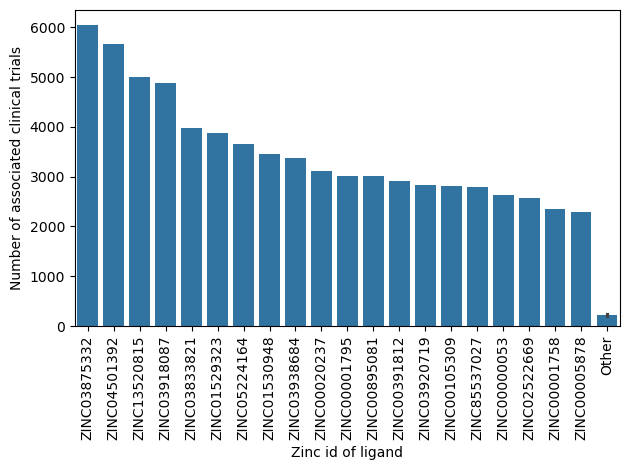

In [8]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="ZINC ID of Ligand",
    ylabel="Number of associated clinical trials",
    title="",
    top_n=20,
)
plt.tight_layout()
plt.show()

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


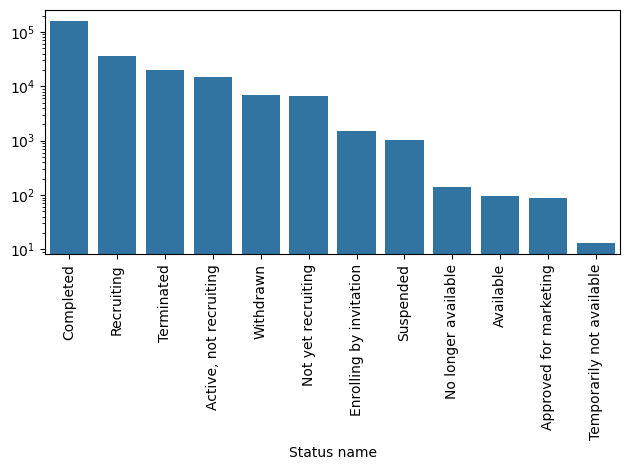

In [9]:
fig, ax = plt.subplots()
plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="status_name",
    ylabel="",
    title="",
    top_n=None,
    yscale="log",
)
plt.tight_layout()
plt.show()

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


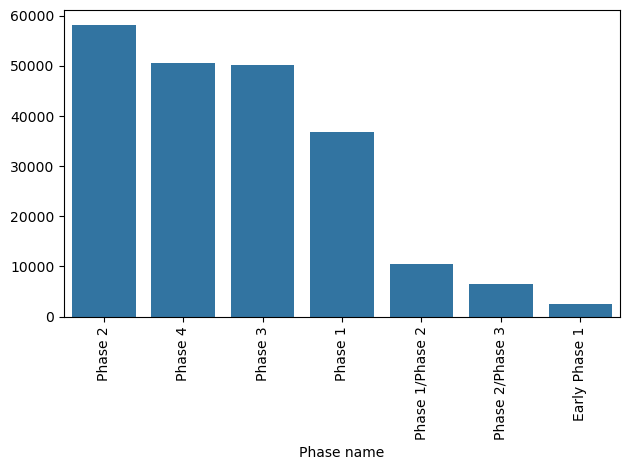

In [10]:
fig, ax = plt.subplots()

plot_clinical_counts(
    df=df_all,
    ax=ax,
    col="phase_name",
    ylabel="",
    title="",
    top_n=None,
    yscale=None,
)
plt.tight_layout()
plt.show()

<Axes: xlabel='start_date', ylabel='Count'>

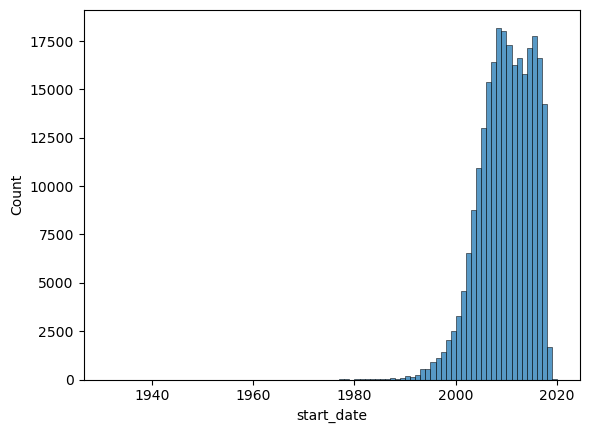

In [11]:
import datetime

sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
)

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/72399223.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


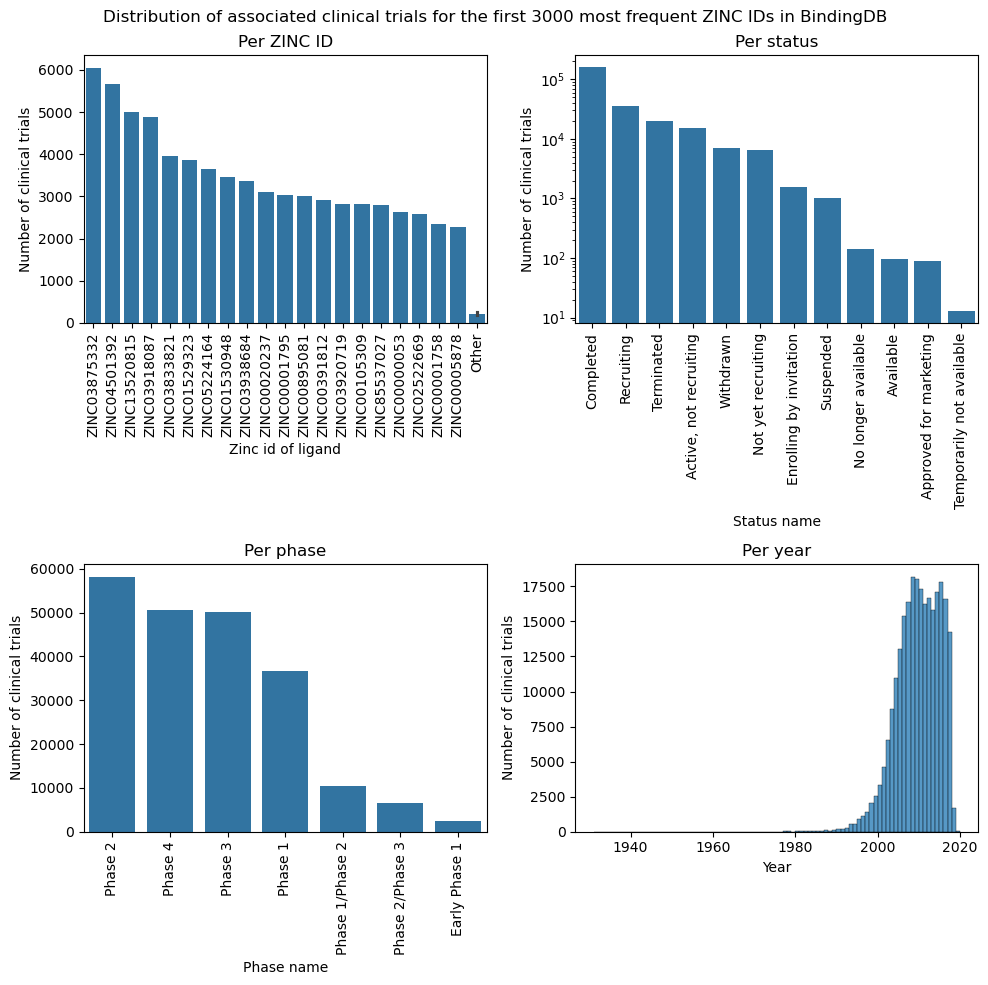

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
((ax1, ax2), (ax3, ax4)) = axes

ylabel = "Number of clinical trials"
list_kwargs = [
    dict(
        title="Per ZINC ID",
        col="ZINC ID of Ligand",
        ylabel=ylabel,
        top_n=20,
    ),
    dict(
        col="status_name",
        ylabel=ylabel,
        title="Per status",
        top_n=None,
        yscale="log",
    ),
    dict(
        col="phase_name",
        ylabel=ylabel,
        title="Per phase",
        top_n=None,
        yscale=None,
    ),
]

for ax, kwargs in zip(axes.flatten(), list_kwargs):
    plot_clinical_counts(df_all, ax, **kwargs)

sns.histplot(
    df_all["start_date"]
    .dropna()
    .apply(lambda date_str: datetime.date.fromisoformat(date_str).year)
    .to_frame(),
    x="start_date",
    binwidth=1,
    ax=ax4,
)
ax4.set_title("Per year")
ax4.set_xlabel("Year")
ax4.set_ylabel(ylabel)

fig.suptitle(
    "Distribution of associated clinical trials for the first 3000 most frequent ZINC IDs in BindingDB"
)

plt.tight_layout()
plt.show()

In [13]:
usecols = [
    "BindingDB Reactant_set_id",
    # "Ligand SMILES",
    # "Ligand InChI",
    # "Ligand InChI Key",
    # "BindingDB MonomerID",
    # "BindingDB Ligand Name",
    "Target Name",
    "Target Source Organism According to Curator or DataSource",
    # "Ki (nM)",
    # "IC50 (nM)",
    # "Kd (nM)",
    # "EC50 (nM)",
    # "kon (M-1-s-1)",
    # "koff (s-1)",
    # "pH",
    # "Temp (C)",
    # "Curation/DataSource",
    # "Article DOI",
    # "BindingDB Entry DOI",
    # "PMID",
    # "PubChem AID",
    "Patent Number",
    # "Authors",
    # "Institution",
    # "Ligand HET ID in PDB",
    # "PDB ID(s) for Ligand-Target Complex",
    # "PubChem CID",
    # "PubChem SID",
    # "ChEBI ID of Ligand",
    # "ChEMBL ID of Ligand",
    # "DrugBank ID of Ligand",
    # "IUPHAR_GRAC ID of Ligand",
    # "KEGG ID of Ligand",
    "ZINC ID of Ligand",
    "Number of Protein Chains in Target (>1 implies a multichain complex)",
    "BindingDB Target Chain Sequence",
    "PDB ID(s) of Target Chain",
    "UniProt (SwissProt) Recommended Name of Target Chain",
    "UniProt (SwissProt) Entry Name of Target Chain",
    "UniProt (SwissProt) Primary ID of Target Chain",
    "UniProt (TrEMBL) Primary ID of Target Chain",
    "UniProt (TrEMBL) Submitted Name of Target Chain",
]

In [14]:
bindingDB = pd.read_csv(
    r"../data/BindingDB_All.tsv",
    sep="\t",
    usecols=usecols,
)

/var/folders/65/r52mz7k10_l6lkp_jfvvl2mr0000gn/T/ipykernel_67819/280020811.py:1: DtypeWarning: Columns (21,36,45,47) have mixed types. Specify dtype option on import or set low_memory=False.
  bindingDB = pd.read_csv(


In [15]:
from src.scripts.disease_plotting import (
    load_uniprotid_diseases,
    quantify_missing_diseases,
    add_keywords_when_comments_missing,
    sort_diseases,
)

diseases = load_uniprotid_diseases()
diseases_df = add_keywords_when_comments_missing(diseases)
diseases_df = diseases_df.rename(columns={"comments_bfill": "diseases"})
diseases_df = diseases_df.dropna(subset="diseases").drop(
    columns=["comments", "keywords"]
)
diseases_df["Disease Classes"] = diseases_df["diseases"].apply(
    lambda l: [sort_diseases(l_i) for l_i in l]
)
diseases_df = diseases_df[['UniProt (SwissProt) Primary ID of Target Chain', 'Disease Classes']]

/Users/ameliethonet/Desktop/epfl/Ada/ada-2024-project-standarddeviants/src/scripts/disease_plotting.py:74: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["comments_bfill"] = df[["comments", "keywords"]].bfill(axis=1)["comments"]


In [16]:
import ast
diseases_df['Disease Classes'] = diseases_df['Disease Classes'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
diseases_df['Disease Classes'] = diseases_df['Disease Classes'].apply(lambda x: [disease for disease in x if disease != "Disease variant"] if isinstance(x, list) else x)

In [17]:
from src.scripts import targets
mapped_names = targets.get_target_class(names_df=bindingDB)
merged = bindingDB.merge(mapped_names, left_index=True, right_index=True)
merged= merged[['UniProt (SwissProt) Recommended Name of Target Chain_y', 'UniProt (SwissProt) Primary ID of Target Chain']]

In [18]:
diseases_target_df = diseases_df.merge(merged, on='UniProt (SwissProt) Primary ID of Target Chain')
diseases_target_df = diseases_target_df.rename(columns={'UniProt (SwissProt) Recommended Name of Target Chain_y': 'Target Classes'})

In [26]:
diseases_target_df

,UniProt (SwissProt) Primary ID of Target Chain,Disease Classes,Target Classes
0,P07949,"[Hirschsprung Disease, Cancer, Neoplasia, Canc...",RTK
1,P07949,"[Hirschsprung Disease, Cancer, Neoplasia, Canc...",RTK
2,P07949,"[Hirschsprung Disease, Cancer, Neoplasia, Canc...",RTK
3,P07949,"[Hirschsprung Disease, Cancer, Neoplasia, Canc...",RTK
4,P07949,"[Hirschsprung Disease, Cancer, Neoplasia, Canc...",RTK
...,...,...,...
1348077,P03923,"[Leber hereditary optic neuropathy, Dystonia, ...",NADH-ubiquinone oxidoreductase chain 6
1348078,O08699,[Cancer],Hormone Receptor
1348079,Q8VCC1,[Cancer],Hormone Receptor
1348080,P00698,[Allergen],Lysozyme C


In [29]:
diseases_target_df = diseases_target_df.groupby("UniProt (SwissProt) Primary ID of Target Chain").agg({
    "Disease Classes": lambda x: list(set(disease for sublist in x for disease in sublist)),
    "Target Classes": lambda x: list(set(x))
}).reset_index()

In [30]:
ZINCids = bindingDB[['UniProt (SwissProt) Primary ID of Target Chain', 'ZINC ID of Ligand']]
ZINCids

,UniProt (SwissProt) Primary ID of Target Chain,ZINC ID of Ligand
0,P03367,NaN
1,P03367,ZINC03948988
2,P03367,ZINC03826079
3,P03367,ZINC14907367
4,P03367,ZINC14907369
...,...,...
2913280,P37238,NaN
2913281,P37238,NaN
2913282,P37238,NaN
2913283,NaN,NaN


In [31]:
ZINCids = (
    ZINCids.groupby('UniProt (SwissProt) Primary ID of Target Chain')['ZINC ID of Ligand']
    .apply(lambda x: x.dropna().tolist())
    .reset_index()
)

In [32]:
ZINCids

,UniProt (SwissProt) Primary ID of Target Chain,ZINC ID of Ligand
0,A0A024B7W1,[]
1,A0A087WW23,[]
2,A0A0B4J268,"[ZINC04374547, ZINC02707861, ZINC00088897, ZIN..."
3,A0A0C5PRQ1,"[ZINC28701816, ZINC01544157]"
4,A0A0D1DYD5,"[ZINC06473979, ZINC38139070, ZINC06473979]"
...,...,...
6526,Q9Z5X1,"[ZINC05830336, ZINC13687231, ZINC13687227]"
6527,Q9Z7P3,[]
6528,Q9ZLT0,"[ZINC40410861, ZINC40380699, ZINC40934488, ZIN..."
6529,Q9ZMY2,[ZINC13648011]


In [33]:
merged_data = diseases_target_df.merge(
    ZINCids,
    on="UniProt (SwissProt) Primary ID of Target Chain"
)

In [36]:
merged_data = merged_data.drop("UniProt (SwissProt) Primary ID of Target Chain", axis="columns")

In [37]:
merged_data

,Disease Classes,Target Classes,ZINC ID of Ligand
0,[Cancer],[Phosphatidylinositol Kinase],"[ZINC84634436, ZINC43154039, ZINC24760115, ZIN..."
1,[Intellectual developmental disorder],[Ubiquitin carboxyl-terminal hydrolase 27],[]
2,[Allergen],[Alpha-amylase],[ZINC91302266]
3,[Cataract],[Dedicator of cytokinesis protein 5],[]
4,[Cancer],[Nucleoprotein TPR],"[ZINC28523447, ZINC28524339]"
...,...,...,...
1488,"[Cancer, Tatton-Brown-Rahman syndrome, Heyn-Sp...",[DNA (cytosine-5)-methyltransferase 3A],"[ZINC13602666, ZINC05050159, ZINC01601036, ZIN..."
1489,"[Immunodeficiency, Incontinentia pigmenti, Aut...",[NF-kappa-B essential modulator],[ZINC00009090]
1490,"[Hyperbilirubinemia, Rotor type]",[Solute carrier organic anion transporter fami...,"[ZINC00579472, ZINC00601283, ZINC03978503, ZIN..."
1491,"[Mitochondrial complex I deficiency, nuclear t...",[NADH dehydrogenase [ubiquinone] 1 beta subcom...,"[ZINC01658901, ZINC01658901]"
